In [1]:
import networkx as nx
import numpy as np
%matplotlib inline

In [2]:
#function to create GN benchmark graph with given expected value in-partition edges
def create_GN_benchmark_graph(k_in):
    #calculate edge probabilities
    k_out=16-k_in
    p=k_in/31.0
    q=k_out/96.0

    #create graph/partitions with nodes
    g=nx.Graph()
    partitions=[]
    for j in xrange(1,5):
        nodes=[j*100+i for i in xrange(32)]
        partitions.append(nodes)
        g.add_nodes_from(nodes)

    #add intra partition edges
    for k in xrange(1,5):
        for i in xrange(32):
            for j in xrange(32):
                if i!=j:
                    if np.random.random() < p:
                        g.add_edge(k*100+i,k*100+j)

    #add cross partition edges
    for k1 in xrange(1,5):
        for k2 in xrange(1,5):
            if (k1!=k2):
                for i in xrange(32):
                    for j in xrange(32):
                        if i!=j:
                            if np.random.random() < q:
                                g.add_edge(k1*100+i,k2*100+j)

    return g,partitions

#function to evaluate a given partition
#Note: partitions should be ordered as originally!!!
def evaluate_partition(partition):
    
    #check partition size
    if len(partition)!=4:
        print "Error, there should be 4 partitions"
        return -1
    
    #calculate correctly assigned nodes
    correct=0
    for part,j in zip(partition,xrange(1,5)):
        for node in part:
            if int(node)/100 == j:
                correct+=1
                
    return correct/128.0

In [3]:
cols=['red','blue','green','yellow']
node_colors=[]
for i in xrange(4):
    c=cols[i]
    for j in xrange(32):
        node_colors.append(c)

In [4]:
test_g,test_g_partitions=create_GN_benchmark_graph(k_in=16)
print test_g_partitions
print evaluate_partition(test_g_partitions)

[[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131], [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231], [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331], [400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431]]
1.0


/home/ribli/tools/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/ribli/tools/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


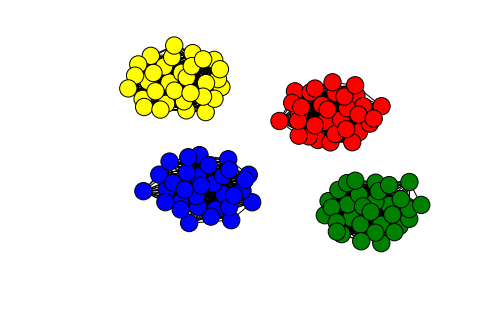

In [5]:
nx.draw_graphviz(create_GN_benchmark_graph(k_in=16)[0],node_color=node_colors)

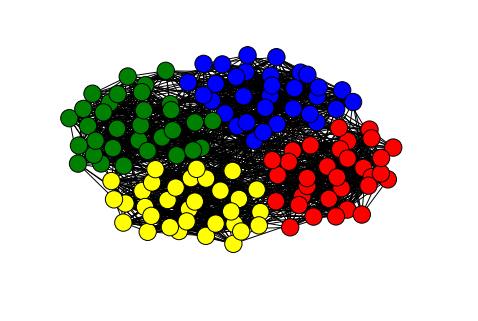

In [6]:
nx.draw_graphviz(create_GN_benchmark_graph(k_in=12)[0],node_color=node_colors)